# Выбор локации для скважины

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Цель данного проекта - определить регион, где добыча принесёт наибольшую прибыль.

В нашем распоряжении пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

Описание данных:
-	id — уникальный идентификатор скважины;
-	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
-	product — объём запасов в скважине (тыс. баррелей).

Также известно:
-   При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
-	Бюджет на разработку скважин в регионе — 10 млрд рублей.
-	Один баррель сырья приносит 450 рублей дохода.

Для реализации поставленной цели будут выполнены следующие шаги:
- загрузка и подготовка данных;
- обучение и проверка модели для каждого региона;
- рассчитан достаточный объём сырья для безубыточной разработки новой скважины;
- выбраны скважины с максимальными значениями предсказаний и посчитана прибыль;
- посчитаны риски и прибыль для каждого региона.



## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [ ]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Таблицы с данные каждого региона имеют одинаковый размер (5 столбцов, 100000 строк), в данных отсутствуют пропуски.

In [ ]:
df_1.describe(), df_2.describe(), df_3.describe()

(                  f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.500419       0.250143       2.502647      92.500000
 std         0.871832       0.504433       3.248248      44.288691
 min        -1.408605      -0.848218     -12.088328       0.000000
 25%        -0.072580      -0.200881       0.287748      56.497507
 50%         0.502360       0.250252       2.515969      91.849972
 75%         1.073581       0.700646       4.715088     128.564089
 max         2.362331       1.343769      16.003790     185.364347,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        1.141296      -4.796579       2.494541      68.825000
 std         8.965932       5.119872       1.703572      45.944423
 min       -31.609576     -26.358598      -0.018144       0.000000
 25%        -6.298551      -8.267985       1.000021      26.9

Признаки f0, f1, f2 в зависимости от региона отличаются, наблюдается только сходство в признаке f2 у региона 1 и региона 3. Также схожи показатели объема запасов у региона 1 и региона 3.

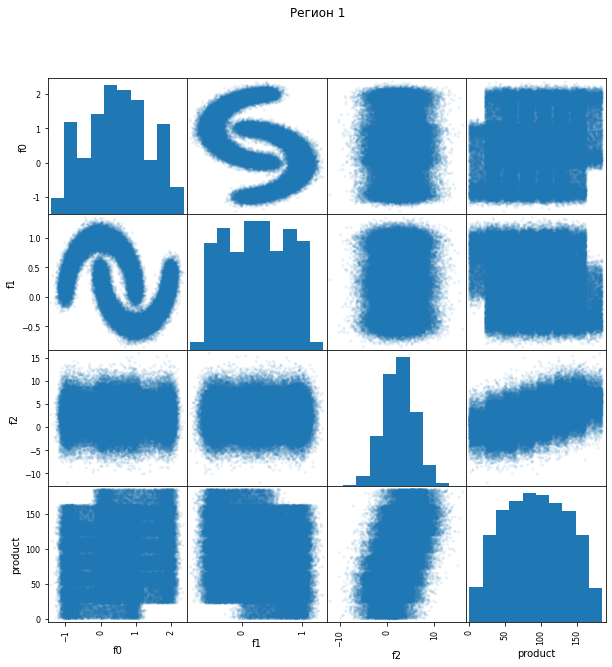

In [ ]:
pd.plotting.scatter_matrix(df_1, alpha=0.1, figsize=(10,10))
plt.suptitle('Регион 1')
plt.show;

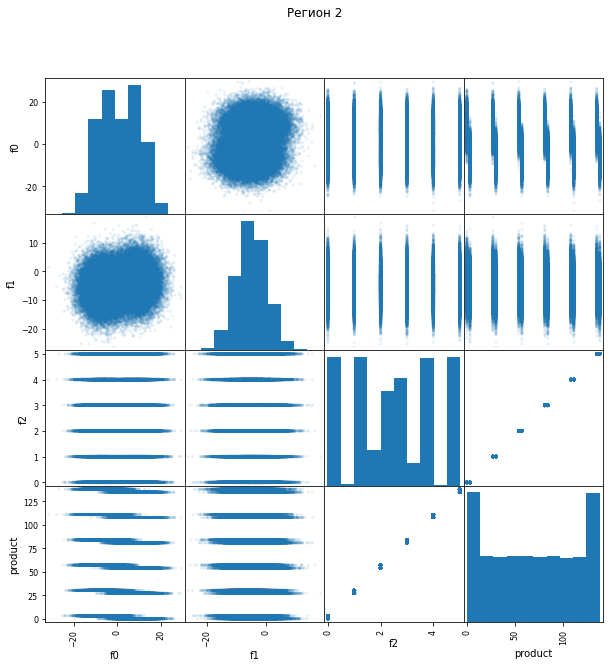

In [ ]:
pd.plotting.scatter_matrix(df_2, alpha=0.1, figsize=(10,10))
plt.suptitle('Регион 2')
plt.show;

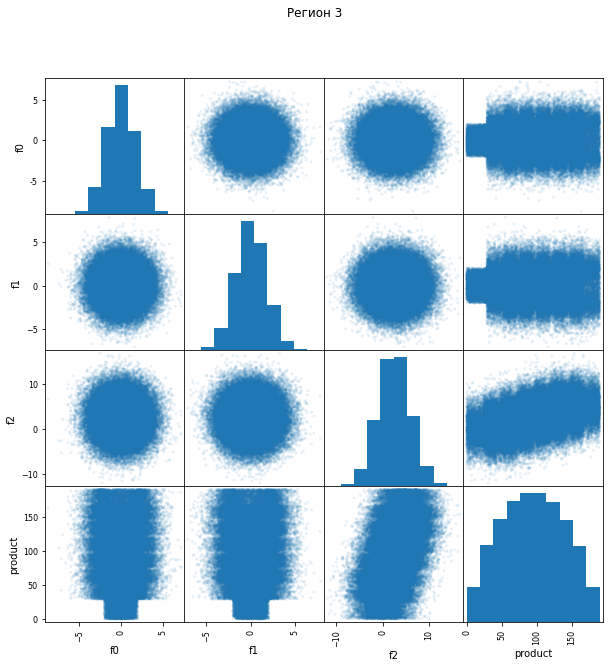

In [ ]:
pd.plotting.scatter_matrix(df_3, alpha=0.1, figsize=(10,10))
plt.suptitle('Регион 3')
plt.show;

In [ ]:
df_1.corr(), df_2.corr(), df_3.corr()

(               f0        f1        f2   product
 f0       1.000000 -0.440723 -0.003153  0.143536
 f1      -0.440723  1.000000  0.001724 -0.192356
 f2      -0.003153  0.001724  1.000000  0.483663
 product  0.143536 -0.192356  0.483663  1.000000,
                f0        f1        f2   product
 f0       1.000000  0.182287 -0.001777 -0.030491
 f1       0.182287  1.000000 -0.002595 -0.010155
 f2      -0.001777 -0.002595  1.000000  0.999397
 product -0.030491 -0.010155  0.999397  1.000000,
                f0        f1        f2   product
 f0       1.000000  0.000528 -0.000448 -0.001987
 f1       0.000528  1.000000  0.000779 -0.001012
 f2      -0.000448  0.000779  1.000000  0.445871
 product -0.001987 -0.001012  0.445871  1.000000)

В регионе 1 и регионе 3 присутствует слабая положительная корреляция между признаком f2 и объемом запасов в скважине, а в регионе 2 очень высокая корреляция между этими же признаками.

In [ ]:
df_1 = df_1.drop(columns=['id'])

In [ ]:
df_2 = df_2.drop(columns=['id'])

In [ ]:
df_3 = df_3.drop(columns=['id'])

Для дальнейшего анализа и обучения моделей столбец с id скважины не понадобится, поэтому данный столбец удаляем.

Были рассмотрены данные геологоразведки трех регионов, все три таблицы содержат одинаковое количество столбцов (5) и строк (100000), в данных отсутствуют пропуски. Данные региона 1 и региона 3 имеют больше сходств - у них похожи показатели среднего, медианы, 0.25 и 0.75 квартили, минимального и максимального значений, стандартного отклонения, также схожая слабая корреляция между признаком f2 и объемом запасов. Регион 2 по всем параметрам отличается от регионов 1 и 3. Для удобства дальнейшей работы с данными был удален столбец id.

## Обучение и проверка модели

**Разбивка данных на обучающую и валидационную выборки**

In [ ]:
target_1 = df_1['product']
features_1 = df_1.drop('product', axis=1)

In [ ]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1,
                                                                                      test_size=0.25,
                                                                                      random_state=12345)

In [ ]:
features_train_1.shape, features_valid_1.shape, target_train_1.shape, target_valid_1.shape

((75000, 3), (25000, 3), (75000,), (25000,))

In [ ]:
target_2 = df_2['product']
features_2 = df_2.drop('product', axis=1)

In [ ]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2,
                                                                                      test_size=0.25,
                                                                                      random_state=12345)

In [ ]:
features_train_2.shape, features_valid_2.shape, target_train_2.shape, target_valid_2.shape

((75000, 3), (25000, 3), (75000,), (25000,))

In [ ]:
target_3 = df_3['product']
features_3 = df_3.drop('product', axis=1)

In [ ]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(features_3, target_3,
                                                                                      test_size=0.25,
                                                                                      random_state=12345)

In [ ]:
features_train_3.shape, features_valid_3.shape, target_train_3.shape, target_valid_3.shape

((75000, 3), (25000, 3), (75000,), (25000,))

**Обучение моделей**

In [ ]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)

LinearRegression()

In [ ]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)

LinearRegression()

In [ ]:
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3)

LinearRegression()

**Предсказания на валидационной выборке**

In [ ]:
predictions_valid_1 = model_1.predict(features_valid_1)

In [ ]:
predictions_valid_2 = model_2.predict(features_valid_2)

In [ ]:
predictions_valid_3 = model_3.predict(features_valid_3)

In [ ]:
predictions_valid_1_mean = predictions_valid_1.mean()

In [ ]:
predictions_valid_2_mean = predictions_valid_2.mean()

In [ ]:
predictions_valid_3_mean = predictions_valid_3.mean()

**Расчет RMSE**

In [ ]:
rmse_1 = mean_squared_error(target_valid_1, predictions_valid_1)**0.5

In [ ]:
rmse_2 = mean_squared_error(target_valid_2, predictions_valid_2)**0.5

In [ ]:
rmse_3 = mean_squared_error(target_valid_3, predictions_valid_3)**0.5

**Средний запас предсказанного сырья и RMSE модели**

In [ ]:
data = {'Регион': ['Регион 1', 'Регион 2', 'Регион 3'],
        'Средний запас предсказанного сырья':[predictions_valid_1_mean, predictions_valid_2_mean, predictions_valid_3_mean],
        'RMSE' : [rmse_1, rmse_2, rmse_3]}

In [ ]:
data = pd.DataFrame(data)

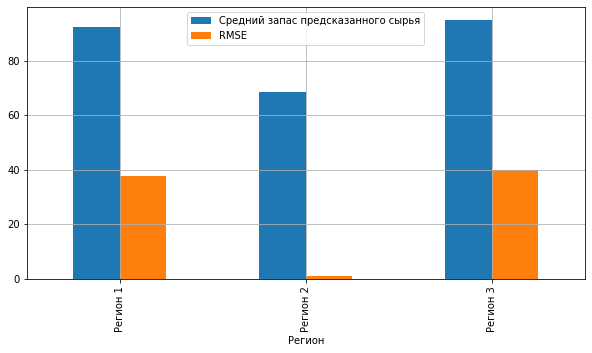

In [ ]:
data.plot.bar(x='Регион', figsize=(10,5), grid=True);

In [ ]:
data

,Регион,Средний запас предсказанного сырья,RMSE
0,Регион 1,92.592568,37.579422
1,Регион 2,68.728547,0.893099
2,Регион 3,94.965046,40.029709


Значения среднего запаса предсказанного сырья практически совпадают со средними целевыми значениями. В регионе 2 значения среднего запаса сырья самые низкие, однако RMSE модели, обученной на данных указанного региона самые лучшие и близки к 0.

## Подготовка к расчёту прибыли

**Сохранение ключевых значений для расчетов в отдельных переменных**

In [ ]:
BUDGET = 10_000_000_000

In [ ]:
REVENUE = 450_000

In [ ]:
TOTAL_POINTS = 500

In [ ]:
BEST_POINTS = 200

**Расчет достаточного объема сырья для безубыточной разработки новой скважины и его сравнение со средним запасом в каждом регионе**

In [ ]:
product_break_even = BUDGET/BEST_POINTS/REVENUE

In [ ]:
product_break_even

111.11111111111111

In [ ]:
product_mean_1 = df_1['product'].mean()

In [ ]:
product_mean_2 = df_2['product'].mean()

In [ ]:
product_mean_3 = df_3['product'].mean()

In [ ]:
print(product_mean_1, product_mean_2, product_mean_3)

92.50000000000001 68.82500000000002 95.00000000000004


In [ ]:
table = {'Показатель': ['объем для безубыточной разработки', 'средний запас в регионе 1',
                        'средний запас в регионе 2', 'средний запас в регионе 3'],
        'Объем сырья, тыс. баррелей': [product_break_even, product_mean_1, product_mean_2, product_mean_3]}

In [ ]:
table=pd.DataFrame(table)

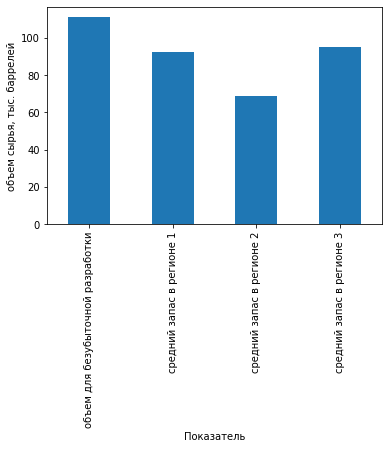

In [ ]:
table.plot.bar(x='Показатель', ylabel='объем сырья, тыс. баррелей', legend=None);

In [ ]:
table

,Показатель,"Объем сырья, тыс. баррелей"
0,объем для безубыточной разработки,111.111111
1,средний запас в регионе 1,92.500000
2,средний запас в регионе 2,68.825000
3,средний запас в регионе 3,95.000000


Средний объем запасов во всех рассматриваемых регионах ниже достаточного объема сырья для безубыточной разработки новой скважины.

## Расчёт прибыли и рисков

**Расчет прибыли по выбранным скважинам и предсказанию модели**

In [ ]:
predictions_valid_1 = pd.Series(predictions_valid_1, index=target_valid_1.index)
predictions_valid_2 = pd.Series(predictions_valid_2, index=target_valid_2.index)
predictions_valid_3 = pd.Series(predictions_valid_3, index=target_valid_3.index)

In [ ]:
def func(predictions, target, count):
    predictions_sort = predictions.sort_values(ascending=False)
    target_sum = target[predictions_sort.index][:count].sum()
    return REVENUE*target_sum-BUDGET

In [ ]:
revenue_total_1 = func(predictions_valid_1, target_valid_1, BEST_POINTS)

In [ ]:
revenue_total_2 = func(predictions_valid_2, target_valid_2, BEST_POINTS)

In [ ]:
revenue_total_3 = func(predictions_valid_3, target_valid_3, BEST_POINTS)

In [ ]:
print('Прибыль регион 1:', revenue_total_1,
      '\nПрибыль регион 2:', revenue_total_2,
      '\nПрибыль регион 3:', revenue_total_3)

Прибыль регион 1: 3320826043.1398506 
Прибыль регион 2: 2415086696.681511 
Прибыль регион 3: 2710349963.5998325


**Расчет рисков и прибыли для каждого региона**

In [ ]:
state = np.random.RandomState(12345)

In [ ]:
def func_2(predictions, target):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=TOTAL_POINTS, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        values.append(func(probs_subsample, target_subsample, best_points))
    values = pd.Series(values)
    lower = values.quantile(q=0.025).round(2)
    upper = values.quantile(q=0.975).round(2)
    mean = values.mean().round(2)
    risk = (len(values[values<0])/len(values))*100
    return lower, upper, mean, risk

In [ ]:
lower_1, upper_1, mean_1, risk_1 = func_2(predictions_valid_1, target_valid_1)

In [ ]:
lower_2, upper_2, mean_2, risk_2 = func_2(predictions_valid_2, target_valid_2)

In [ ]:
lower_3, upper_3, mean_3, risk_3 = func_2(predictions_valid_3, target_valid_3)

In [ ]:
print('Регион 1: Средняя прибыль:', mean_1, ', доверительный интервал:', lower_1, ':', upper_1, ', риск убытков:', risk_1,
     '\nРегион 2: Средняя прибыль:', mean_2, ', доверительный интервал:', lower_2, ':', upper_2,  ', риск убытков:', risk_2,
     '\nРегион 3: Средняя прибыль:', mean_3, ', доверительный интервал:', lower_3, ':', upper_3, ', риск убытков:', risk_3)

Регион 1: Средняя прибыль: 425938526.91 , доверительный интервал: -102090094.84 : 947976353.36 , риск убытков: 6.0 
Регион 2: Средняя прибыль: 518259493.7 , доверительный интервал: 128123231.43 : 953612982.07 , риск убытков: 0.3 
Регион 3: Средняя прибыль: 420194005.34 , доверительный интервал: -115852609.16 : 989629939.84 , риск убытков: 6.2


In [ ]:
final_table = {'Регион': ['Регион 1', 'Регион 2', 'Регион 3'],
               'Средняя прибыль, млн. руб': [mean_1/1000000, mean_2/1000000, mean_3/1000000],
               'Риск убытков, %': [risk_1, risk_2, risk_3]}

In [ ]:
final_table = pd.DataFrame(final_table)

In [ ]:
final_table

,Регион,"Средняя прибыль, млн. руб","Риск убытков, %"
0,Регион 1,425.938527,6.0
1,Регион 2,518.259494,0.3
2,Регион 3,420.194005,6.2


In [ ]:
result = pd.merge(data, final_table, on="Регион")

In [ ]:
result

,Регион,Средний запас предсказанного сырья,RMSE,"Средняя прибыль, млн. руб","Риск убытков, %"
0,Регион 1,92.592568,37.579422,425.938527,6.0
1,Регион 2,68.728547,0.893099,518.259494,0.3
2,Регион 3,94.965046,40.029709,420.194005,6.2


В проекте было рассмотрено три региона (обозначены как регион 1, регион 2, регион 3), по которым предоставлены пробы нефти.
Показатели региона 1 и региона 3 имеют много сходств, а регион 2 по всем параметрам отличается от регионов 1 и 3.  
После обучения моделей алгоритмом линейной регрессии полученные значения среднего запаса предсказанного сырья во всех регионах практически совпадают со средними целевыми значениями. В регионе 2 - значения среднего запаса сырья самые низкие -68.728547, однако RMSE модели, обученной на данных региона 2 самые лучшие - 0.893099.
Рассчитанный объем сырья для безубыточной разработки составил 111.111 тыс. баррелей, что выше, чем  средний объем запасов в рассматриваемых регионах.
 При выборе 200 скважин с максимальными предсказаниями модели и расчетом прибыли для суммы целевых значений объема запасов, соответствующим полученным предсказаниям, самая большая величина прибыли была получена в регионе 1 (3 320 826 043), в регионе 3 прибыль составила 2 710 349 963, а в регионе 2 - самое маленькое значение 2 415 086 696.
Однако, при анализе возможной прибыли и рисков техникой Bootstrap, наименьшая  вероятность убытков и наибольшая средняя прибыль в регионе 2.
Т.о. к разработке можно рекомендовать именно регион 2, т.к. риск убытков в данном регионе всего 0,3 %.